In [1]:
%load_ext autoreload
%autoreload 2

import os
import glob
from yaml import safe_load as yaml_load

import numpy as np
import tifffile
import matplotlib.pyplot as plt

from stardist import random_label_cmap

from keras_transfer_learning import model, dataset

lbl_cmap = random_label_cmap()

Using TensorFlow backend.


List the models

In [2]:
print('\n'.join([f for f in glob.glob(os.path.join('.', 'models', '*'))]))

./models/small-stardist_stardist-dsb2018_pretrained
./models/small-unet_stardist-dsb2018
./models/small-stardist_stardist-dsb2018


Create the model

In [3]:
model_name = 'small-unet_stardist-dsb2018'
model_dir = os.path.join('.', 'models', model_name)

m = model.Model(model_dir=model_dir, load_weights='last')

Instructions for updating:
Colocations handled automatically by placer.


Load a data example

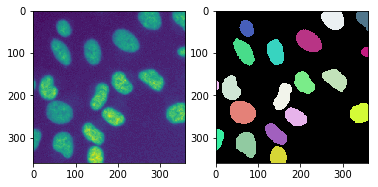

In [4]:
seed = None # Change to load another example

d = dataset.Dataset(m.config)

img, mask = d.get_random_test_img()

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap=lbl_cmap)
plt.show()

Run the model on the example

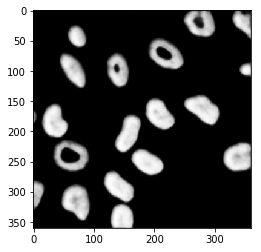

In [5]:
pred = m.predict(img)[0]

# TODO plot for stardist
if isinstance(pred, tuple):
    plt.subplot(1, 2, 1)
    plt.imshow(pred[0][..., 0])
    plt.subplot(1, 2, 2)
    plt.imshow(pred[1][..., 0])
else:
    plt.imshow(pred[...,0], cmap='gray')
plt.show()

Process the output

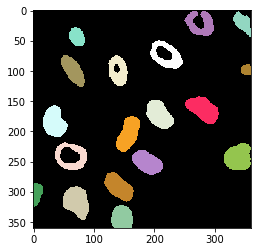

In [6]:
labels = m.process_prediction(pred)[0]

# TODO labels vs segm
plt.imshow(labels, cmap=lbl_cmap)
plt.show()